In [2]:
# importing libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# set random seed for reproducibility 
np.random.seed(42)

In [6]:
# creating a dummy dataset 
date_range = pd.date_range(start='2022-01-01', end='2023-12-31', freq= 'D')

# create dummy sales data
n_records = len(date_range)

# Add seasonality (higher sales in Nov-Dec)
base_sales = 1000
seasonal_factor = np.sin(np.arange(n_records) * 2 * np.pi / 365) * 200
trend = np.arange(n_records) * 0.5  # Slight upward trend
noise = np.random.randn(n_records) * 100

sales = base_sales + seasonal_factor + trend + noise

# Create DataFrame
df = pd.DataFrame({
    'date': date_range.astype(str),  # Store as string initially
    'sales': sales.clip(min=0),  # No negative sales
    'category': np.random.choice(['Electronics', 'Clothing', 'Food', 'Books'], n_records),
    'store': np.random.choice(['Store A', 'Store B', 'Store C'], n_records)
})

In [7]:
df.shape

(730, 4)

In [8]:
df.head()

,date,sales,category,store
0,2022-01-01,1019.584526,Food,Store A
1,2022-01-02,906.105393,Books,Store A
2,2022-01-03,1048.709598,Clothing,Store A
3,2022-01-04,841.565573,Clothing,Store A
4,2022-01-05,1118.676049,Books,Store A


In [ ]:
# checking data types 
df.dtypes       # here date is object which needs to be a datetime.

date         object
sales       float64
category     object
store        object
dtype: object

In [12]:
# converting to datetime with pd.to_datetime 

# converting string to datetime 
df['date'] = pd.to_datetime(df['date'])

df.dtypes

date        datetime64[ns]
sales              float64
category            object
store               object
dtype: object

In [13]:
# practising different date formats 

# creating a small dataframe with different date formats 
date_examples = pd.DataFrame({
    'format1': ['2023-01-15', '2023-02-20', '2023-03-10'],
    'format2': ['01/15/2023', '02/20/2023', '03/10/2023'],
    'format3': ['15-Jan-2023', '20-Feb-2023', '10-Mar-2023'],
    'format4': ['2023-01-15 14:30:00', '2023-02-20 09:15:00', '2023-03-10 18:45:00']
})

In [14]:
date_examples

,format1,format2,format3,format4
0,2023-01-15,01/15/2023,15-Jan-2023,2023-01-15 14:30:00
1,2023-02-20,02/20/2023,20-Feb-2023,2023-02-20 09:15:00
2,2023-03-10,03/10/2023,10-Mar-2023,2023-03-10 18:45:00


In [15]:
date_examples.dtypes

format1    object
format2    object
format3    object
format4    object
dtype: object

In [18]:
# converting each data format as it is of object data type

date_examples['datetime1'] = pd.to_datetime(date_examples['format1'])
date_examples['datetime2'] = pd.to_datetime(date_examples['format2'])
date_examples['datetime3'] = pd.to_datetime(date_examples['format3'])
date_examples['datetime4'] = pd.to_datetime(date_examples['format4'])

In [19]:
date_examples.dtypes

format1              object
format2              object
format3              object
format4              object
datetime1    datetime64[ns]
datetime2    datetime64[ns]
datetime3    datetime64[ns]
datetime4    datetime64[ns]
dtype: object

In [28]:
# extracting date components

# extracting various components using .dt accessor  
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek     # monday = 0 and sunday = 6
df['quarter'] = df['date'].dt.quarter
df['week'] = df['date'].dt.isocalendar().week

In [29]:
df.head(5)

,date,sales,category,store,year,month,day,day_of_week,day_name,month_name,quarter,week
0,2022-01-01,1019.584526,Food,Store A,2022,1,1,5,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,52
1,2022-01-02,906.105393,Books,Store A,2022,1,2,6,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,52
2,2022-01-03,1048.709598,Clothing,Store A,2022,1,3,0,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,1
3,2022-01-04,841.565573,Clothing,Store A,2022,1,4,1,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,1
4,2022-01-05,1118.676049,Books,Store A,2022,1,5,2,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,1,1


In [ ]:
# time based filtering 

# filtering data for a specific year
data_2023 = df[df['year'] == 2023]
len(data_2023)

365

In [34]:
# filtering data for a specific month 
december_Data = df[df['month'] == 12]
len(december_Data)

62

In [35]:
# filtering for Q4
q4_Data = df[df['quarter']== 4]
len(q4_Data)

184

In [42]:
# filter using data range 
start_date = '2023-06-01'
end_Date = '2023-08-31'

summer_2023 = df[(df['date'] >= start_date) & (df['date'] <= end_Date)]
len(summer_2023)

summer_2023.head()

,date,sales,category,store,year,month,day,day_of_week,day_name,month_name,quarter,week
516,2023-06-01,1364.620825,Food,Store B,2023,6,1,3,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,22
517,2023-06-02,1281.751040,Books,Store B,2023,6,2,4,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,22
518,2023-06-03,1379.633133,Books,Store B,2023,6,3,5,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,22
519,2023-06-04,1198.142337,Electronics,Store A,2023,6,4,6,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,22
520,2023-06-05,1384.269362,Food,Store C,2023,6,5,0,<bound method PandasDelegate._add_delegate_acc...,<bound method PandasDelegate._add_delegate_acc...,2,23


In [55]:
# practise exercises 

# 1. Find which category had the highest sales in each month of 2023

category_month = df[df['year'] == 2023].groupby(['month', 'category'])['sales'].sum().reset_index()

best_category_per_month = category_month.loc[category_month.groupby('month')['sales'].idxmax()]

#['sales'].idxmax() - For each month, find the **index** of the row with maximum sales

best_category_per_month

,month,category,sales
0,1,Books,13413.483528
4,2,Books,13079.888377
8,3,Books,14466.567128
12,4,Books,12314.907586
17,5,Clothing,14201.212971
20,6,Books,14598.181831
27,7,Food,13870.449125
31,8,Food,10313.353544
35,9,Food,13049.076406
39,10,Food,12818.396598


In [62]:
# rolling average 

df_sorted = df.sort_values('date').copy()

df_sorted['rolling_7day_avg'] = df_sorted['sales'].rolling(window= 7, min_periods= 1).mean()

df_sorted['rolling_7day_avg']

0      1019.584526
1       962.844959
2       991.466506
3       953.991272
4       986.928228
          ...     
725    1386.124839
726    1400.495105
727    1405.447567
728    1403.480599
729    1413.588584
Name: rolling_7day_avg, Length: 730, dtype: float64

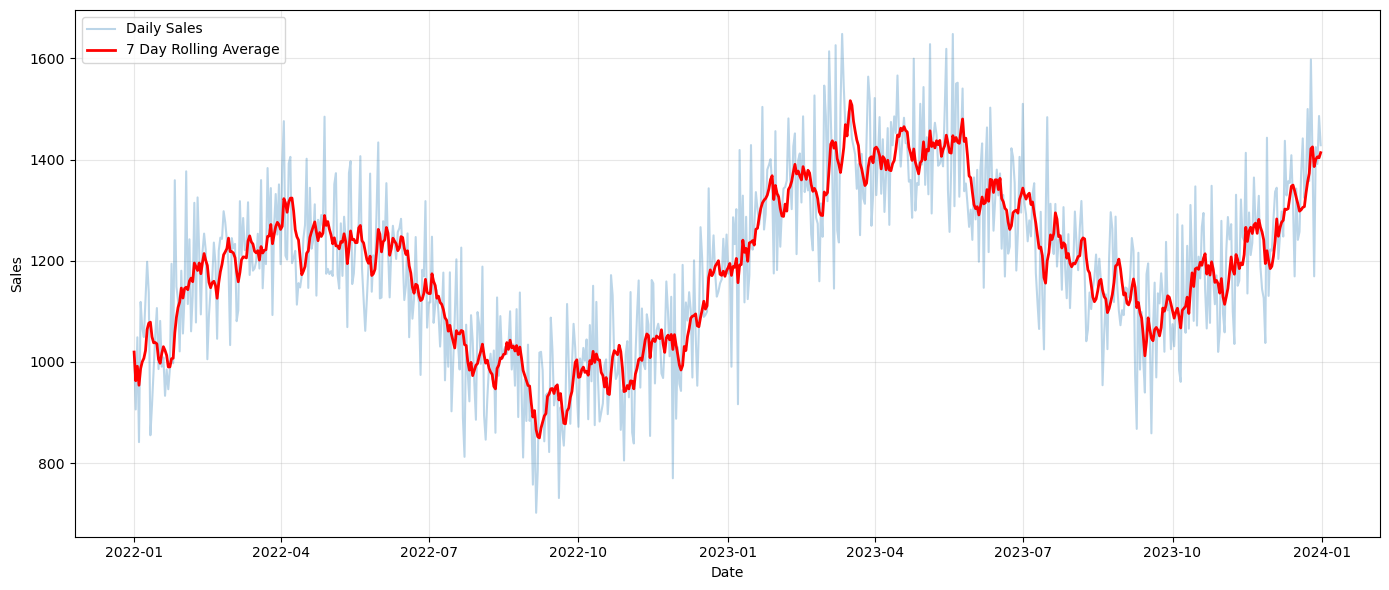

In [71]:
plt.figure(figsize= (14,6))
plt.plot(df_sorted['date'], df_sorted['sales'], alpha = 0.3, label = 'Daily Sales')
plt.plot(df_sorted['date'], df_sorted['rolling_7day_avg'], linewidth = 2, label = '7 Day Rolling Average', color = 'red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True, alpha = 0.3)
plt.tight_layout()
plt.show()